In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
from google.colab import files

In [12]:
uploaded = files.upload()

Saving demonstration-image.png to demonstration-image.png


In [16]:
image = cv2.imread("demonstration-image.png")
image.shape

(436, 772, 3)

In [17]:
x,y,z = image.shape

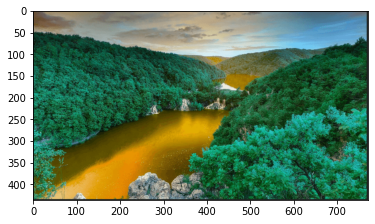

In [18]:
plt.imshow(image)

In [19]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

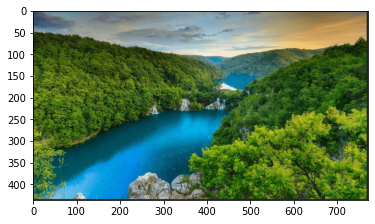

In [20]:
plt.imshow(image)

In [21]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [22]:
print(pixel_values.shape)

(336592, 3)


In [23]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [24]:
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [25]:
centers = np.uint8(centers)
labels = labels.flatten()

In [26]:
segmented_image = centers[labels.flatten()]

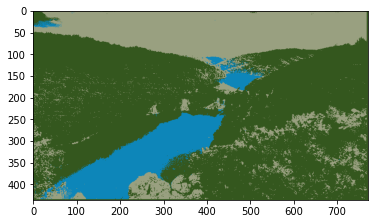

In [27]:
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

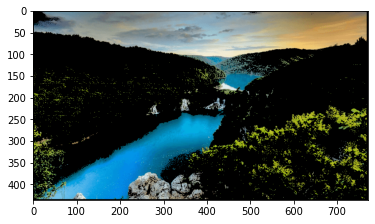

In [28]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 3))
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)
plt.show()